<h1>Read data into a dataframe</h1>



In [1]:
import pandas as pd
%matplotlib inline
train_url = "https://raw.githubusercontent.com/NicholasBlaskey/DATA440-indep-study/master/svms/data/train.csv"
test_url = "https://raw.githubusercontent.com/NicholasBlaskey/DATA440-indep-study/master/svms/data/test.csv"
train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)
print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


<h1>Explore dataset</h1>

In [2]:
def dropIfExists(df, column):
  if column in df.columns:
    del df[column]

# Drop unneeded columns
dropIfExists(train_data, "PassengerId")
dropIfExists(test_data, "PassengerId")
dropIfExists(train_data, "Name")
dropIfExists(test_data, "Name")
dropIfExists(train_data, "Ticket")
dropIfExists(test_data, "Ticket")

# We potentially could get info from Cabin but we are dropping for simplicity
dropIfExists(train_data, "Cabin")
dropIfExists(test_data, "Cabin")


train_data.head()
#test_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
for i in ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]:
  print("Column", i)
  print(train_data[i].value_counts(), "\n")

Column Survived
0    549
1    342
Name: Survived, dtype: int64 

Column Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64 

Column Sex
male      577
female    314
Name: Sex, dtype: int64 

Column SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

Column Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 

Column Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64 



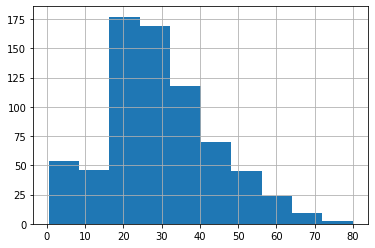

In [4]:
train_data["Age"].hist()

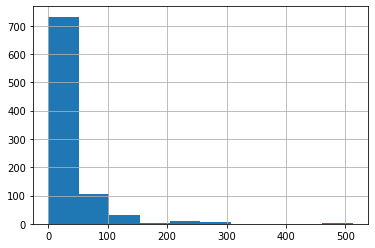

In [5]:
train_data["Fare"].hist()

In [6]:
train_data.groupby(["Survived"]).agg(["mean"])

,Pclass,Age,SibSp,Parch,Fare
,mean,mean,mean,mean,mean
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


<h1>Preprocess data</h1>

In [7]:
# We find a lot of NaN in the age column
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C
863,0,3,female,NaN,8,2,69.5500,S
868,0,3,male,NaN,0,0,9.5000,S
878,0,3,male,NaN,0,0,7.8958,S


In [8]:
# We are going to replace the age by the average 
train_data = train_data.fillna(train_data.mean())
test_data = test_data.fillna(train_data.mean())

In [9]:
# We find just two rows in which Embarked is NaN and for those we will just drop column
print(train_data[train_data.isnull().any(axis=1)])
print(test_data[test_data.isnull().any(axis=1)])
train_data = train_data[train_data['Embarked'].notna()]

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN
Empty DataFrame
Columns: [Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
Index: []


In [10]:
# One hot encode categorical variables
train_data = pd.get_dummies(train_data, columns = ["Pclass", "SibSp", "Parch", "Sex", "Embarked"])
test_data = pd.get_dummies(test_data, columns = ["Pclass", "SibSp", "Parch", "Sex", "Embarked"])
train_data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1,1,38.000000,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,1,35.000000,53.1000,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0,35.000000,8.0500,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
888,0,29.699118,23.4500,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
889,1,26.000000,30.0000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(711, 24)
(178, 24)
(711,)
(178,)


In [13]:
from sklearn.preprocessing import StandardScaler    

In [14]:
num_scaler = StandardScaler()

num_scaler.fit(X_train[["Age", "Fare"]])
def scale(scaler, df):
  return pd.concat([
                    df.drop(["Age", "Fare"], axis=1).reset_index(drop=True), 
                    pd.DataFrame(scaler.transform(df[["Age", "Fare"]])).reset_index(drop=True)
                    ], axis = 1)

X_train = scale(num_scaler, X_train)
X_val = scale(num_scaler, X_val)
X_test = scale(num_scaler, test_data)

<h1>Training different degrees of polynomial svms</h1>


In [15]:
from sklearn.svm import SVC

In [16]:
degrees = list(range(25))
train_scores = []
val_scores = []
for degree in degrees:
  svm = SVC(kernel="poly", degree = degree)
  svm.fit(X_train, y_train)
  train_scores.append(svm.score(X_train, y_train))
  val_scores.append(svm.score(X_val, y_val))
  print("Finished evaling degree", degree)

Finished evaling degree 0
Finished evaling degree 1
Finished evaling degree 2
Finished evaling degree 3
Finished evaling degree 4
Finished evaling degree 5
Finished evaling degree 6
Finished evaling degree 7
Finished evaling degree 8
Finished evaling degree 9
Finished evaling degree 10
Finished evaling degree 11
Finished evaling degree 12
Finished evaling degree 13
Finished evaling degree 14
Finished evaling degree 15
Finished evaling degree 16
Finished evaling degree 17
Finished evaling degree 18
Finished evaling degree 19
Finished evaling degree 20
Finished evaling degree 21
Finished evaling degree 22
Finished evaling degree 23
Finished evaling degree 24


In [17]:
import matplotlib.pyplot as plt

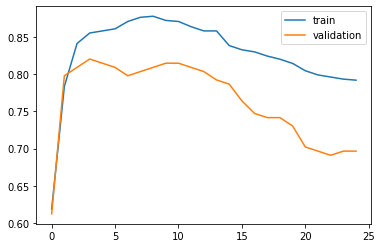

In [18]:
plt.plot(degrees, train_scores, label = "train")
plt.plot(degrees, val_scores, label = "validation")
plt.legend()

<h1>Compare linear to rbf kernel svm</h1>

In [19]:
from sklearn.svm import LinearSVC

In [20]:
linear = LinearSVC(loss = "hinge")
linear.fit(X_train, y_train)

gaussRBF = SVC(kernel="rbf", gamma=5)
gaussRBF.fit(X_train, y_train)

def scoreModel(model, name):
  print(name, "scored ", model.score(X_train, y_train), " for train set")
  print(name, "scored ", model.score(X_val, y_val), " for validation set")

scoreModel(linear, "linear")
print()
scoreModel(gaussRBF, "gaussRBF")

linear scored  0.8030942334739803  for train set
linear scored  0.7921348314606742  for validation set

gaussRBF scored  0.9043600562587905  for train set
gaussRBF scored  0.7528089887640449  for validation set


<h1>Compare different gamma values for RBF kernel</h1>


In [21]:
gammas = []
train_scores = []
val_scores = []
for gamma in range(1, 25):
  gaussRBF = SVC(kernel = "rbf", gamma = gamma)
  gaussRBF.fit(X_train, y_train)

  gammas.append(gamma)
  train_scores.append(gaussRBF.score(X_train, y_train))
  val_scores.append(gaussRBF.score(X_val, y_val))

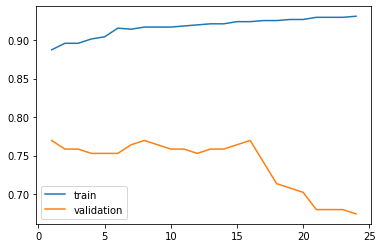

In [22]:
plt.plot(gammas, train_scores, label = "train")
plt.plot(gammas, val_scores, label = "validation")
plt.legend()